# Week 6 Summary
> NAME: $\color{red}{\text{    Phu Dang     }}$
> 
> PID: $\color{red}{\text{    A16913100    }}$
>
> 
---

I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

## Key Takeaways from Week 6


#### Monday: 

Regression Analysis

- Simple linear regression
- Estimation of the regression line
- Coefficients, predictions, residuals


#### Wednesday

Course evaluation and multivariate regression

- Normal random variable realization
    
- Log-likelihood function
    
- Maximum likelihood estimation
    
- Regression in multiple variables


#### Friday: 

- Multivariate regression 
    
- Coefficients, predictions, residuals
    
- Interpretation of results

- Interpretation of the partial derivative

- Diagnostics


---

%%latex
\newpage

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import ipywidgets as widgets
from ipywidgets import interact, fixed
%matplotlib inline

## Monday, Feb 12th

Monday was coverage of linear regression

Key concepts covered:

- **Regression analysis**
    - Regression in a single variable
        - Modelling the relationship between x and y (x's influences on y)
        - Can be expressed as:
        $$
        y_i = \beta_0 + \beta_1 x_i + \epsilon_i
        $$
        
        where $\beta_0 \text{ and } \beta_1$ are the intercept and slope of the line, and $\epsilon_i$ is the error term.
        
        The least squares method is used to estimate the values of $\beta_0 \text{ and } \beta_1$ that minimioze the sum of the squared differences between the observed and predicted values.
        
        $$
        Loss(\beta_0, \beta_1) = \sum_{i=1}^n (y_i - \hat y_i)^2 = \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2
        $$
        
        The regression line can be estimated by:
        
        $$
        (X^T X)^{-1} X^T y
        $$
        
    - Coefficients, predictions, residuals
        - Predicted values: 
        $$
        \hat y = \hat \beta_0 + \hat \beta_1 x
        $$
        
        - Residuals
            - The residual for the i-th observation is the difference between the observed and predicted values for y:    
            $$
            \epsilon_i = y_i - \hat y_i
            $$
    
    
    
- **Interpretation of regression line**:
    - Three different interpretations of the regression line:
    
        - (1) Sum of squares - the line as the best linear approximation to the relationship between x and y in terms of minimizing the sum of squares of the residuals
        
        - (2) Correlation interpretation - the slope of the regression line, $\hat \beta_1$ is a measure of the correlation between the independent and dependent variables 
        
        $$
        \hat \beta_1 = \frac{\sum_{i=1}^n (x_i - \overline x) (y_i - \overline y)}{\sum_{i=1}^n (x_i - \overline x)^2} = r_{xy} \frac{s_y}{s_x}
        $$
        
        where $s_x$ and $s_y$ are the standard deviations of x and y, and $r_{xy}$ is the correlation coefficient between x and y given by:
        
        $$
        r_{xy} = \frac{\sum_{i=1}^n (x_i - \overline x)(y_i - \overline y)}{\sqrt{\sum_{i=1}^n (x_i - \overline x)^2} \times \sqrt{\sum_{i=1}^n (y_i - \overline y)^2}}
        $$
        
        - (3) Maximum likelihood interpretation:
        
        Assume the error terms $\epsilon_i$ are normally distributed with mean 0 and variance $\sigma^2$. Then the distribution of the dependent variable y given the independent variable x is given by:
        
        $$
        y_i \approx N(\beta_0 + \beta_1 x_i, \sigma^2),
        $$
        
        where the unknown population parameters are $\beta_0, \beta_1, \text{ and } \sigma^2$.
        
        Probability density function
        
        If $y_i|x_i \approx N(\beta_0 + \beta_1 x_i, \sigma^2$, the pdf of $y_i$ given $x_i$ is given by:
        
        $$
        f(y_i|x_i, \beta_0, \beta_1, \sigma^2 = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{(-\frac{(y_i - \beta_0 - \beta_1 x_i)^2}{2 \sigma^2})}
        $$
        
        Likelihood function
        
        The likelihood function is given by:
        
        $$
        L(\beta_0, \beta_1, \sigma^2) = \prod_{i=1}^n f(y_i|x_i, \beta_0, \beta_1, \sigma^2)
        $$
        
        Log likelihood function:
        
        $$
        l = \sum_{i=1}^n log (y_i|x_i, \beta_0, \beta_1, \sigma^2) 
        $$
        $$
        = -\frac{n}{2} log (2 \pi \sigma^2) - \frac{1}{2 \sigma^2} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2
        $$
        
        Additionally
        
        $$
        \hat \sigma^2 = \frac{1}{n-2} \sum_{i=1}^n (y_i - \hat y_i)^2
        $$
        

- **Regression in multiple variables**:

    - y is a linear combination of x's


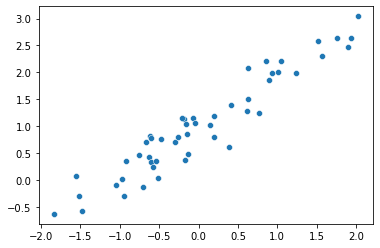

In [2]:
# Simple linear regression

x, y = np.random.multivariate_normal([0,1], [[1, 0.96], [0.96, 1]], 50).T
sns.scatterplot(x=x, y=y);

In [3]:
# Get params

X = np.array([np.array([1,datum]) for datum in x])
ws = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))

In [4]:
ws

array([0.98759982, 0.90684261])

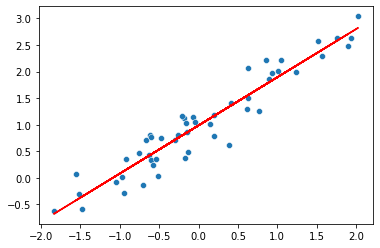

In [5]:
# Plot line of best fit

sns.scatterplot(x=x, y=y)
plt.plot(x, x*ws[1]+ws[0], 'r');

In [6]:
# Get residuals

yHat = x*ws[1]+ws[0]
resids = y - yHat

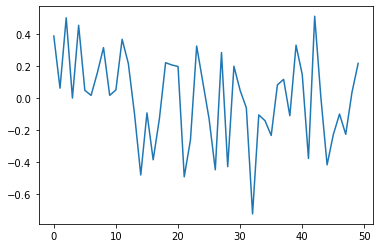

In [7]:
# Plot residuals

plt.plot(resids);

---

%%latex 
\newpage

## Wed, Feb 14th

Wednesday was a reassessment of the course structure and life. Followed by a recap of monday, including single variable linear regression and its interpretation through the maximum likelihood. We then covered the log-likelihood function and how to perform maximum likelihood estimation.

Key concepts covered:

- Normal random variable realization
    - Idea: each point is one normal r.v. whose mean is its prediction on the regression line, with variance $\sigma^2$
    
- Log-likelihood function
    - Essentially the sum of log densities (summation over n)
    
- Maximum likelihood estimation
    - Find $\hat \beta_0,\hat \beta_1,\hat \sigma^2$ using argmax of the log-likelihood
    
    - Plus:
    $$
    \hat \sigma^2 = \frac{1}{n-2} \sum_{i=1}^n (y_i - \hat y_i)^2
    $$
    
- Regression in multiple variables
    - Rows are observations, columns are variables
    - Our "object" of best fit becomes a plane
    - Changing $\beta_0$ changes the vertical placement of the plane, changing $\beta_1$ changes the slope of the plane along the $x_1$ axis, changing $\beta_2$ changes the slope of the plane along the $x_2$ axis.


In [8]:
x1 = np.random.rand(200) - 0.5
x2 = np.random.rand(200) - 0.5
y = 5 + 2*x1 + 3*x2 + 0.5 * np.random.normal(size=200)

In [9]:
# Multivariate regression plane visualized

@interact(b0=(-10, 10, 0.5), b1=(-5, 5, 0.25), b2=(-5, 5, 0.25), residuals=False)

def plot_regression(b0, b1, b2, residuals):

    fig = px.scatter_3d(x=x1, y=x2, z=y)

    # set axis labels and decrease marker size
    fig.update_layout(
        scene = dict(
            xaxis_title='X1',
            yaxis_title='X2',
            zaxis_title='Y'),
            margin=dict(l=0, r=0, b=0, t=0)
    )

    fig.update_traces(marker=dict(size=5))
    
    x1_grid, x2_grid = np.meshgrid(np.linspace(-0.5, 0.5, 100), np.linspace(-0.5, 0.5, 100))
    yHat = b0 + b1*x1_grid + b2*x2_grid
    
    fig.add_trace(
        go.Surface(x=x1_grid, y=x2_grid, z=yHat, opacity=0.5)
    )
    
    if residuals:
        for i in range(len(x1)):
            fig.add_trace(
                go.Scatter3d(
                    x=[x1[i], x1[i]], 
                    y=[x2[i], x2[i]], 
                    z=[b0+b1*x1[i]+b2*x2[i], y[i]],
                    mode='lines',
                    line=dict(color='black', width=2))
            )
        
    fig.update_layout(showlegend=False, scene_camera=dict(eye=dict(x=2.0, y=0.5, z=0.1)))    
    
    fig.show()

interactive(children=(FloatSlider(value=0.0, description='b0', max=10.0, min=-10.0, step=0.5), FloatSlider(val…

---

In [11]:
# Get plane of best fit

X = []

for i in range(len(x1)):
    X.append(np.array([1, x1[i], x2[i]]))

X = np.array(X)

In [12]:
ws = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))
ws

array([4.9638418 , 2.00124368, 2.87512978])

%%latex 
\newpage

## Fri, Feb 16th

Friday was a review of regression in multiple variables with a review of how the plane of best fit lies and changes across the data as its components changes. We then covered generating predictions in the multivariate case and getting residuals. Calculations were done both manually using numpy and black-box using OLS from statsmodels. Ended with diagnostic tests to see when linear regression is appropriate.

Key concepts covered:

- Multivariate regression 
    - The components (predictive function, squared error, loss function) are the same as single variable, except having more weights in the form of (+ $w_i x_i$) for feature i.
    
    
- Coefficients, predictions, residuals
    - The feature matrix is known as the "design matrix"
        - Dimension: (num of observations) x (num of features)
        
    - Same normal equation to solve for optimal weights
    
- Interpretation of results
    - First: plane of best fit
    
    - Second: maximum likelihood estimator
        - Assuming all $y_i$'s are essentially linear combinations of x's plus some error $\epsilon_i$.
        - Additionally, the errors, $\sigma_i$, follows $N \approx (0, \sigma^2)$
        - Then, the key is: our true value lies somewhere on the plane, and our observed values is basically the realization of the point on the regression plane plus some normally-distributed noise captured by the residuals.
        - The estimated value $\hat \beta$ is the maximum likelihood estiamte of the population params, $\beta$, and the estimated value, $\hat \sigma^2$, is the maximum likelihood estimate of hte variance of the error term $\epsilon_i$ given by:
        
$$
\hat \sigma^2 = \frac{1}{n-p} \sum_{i=1}^n (y_i - \hat y_i)^2
$$

--> Key to allowing us to perform statistical inference on the estimated regression params

- **Interpretation of the partial derivative** of the expected value of $y_i$ w.r.t. the $j^{th}$ independent variable is the **rate of change of the y variable in the direction of $x_j$, one unit change**.

- **Diagnostics**:
    - Key assumptions of using lin reg:
        - The relationship between the dependent and independent variables is linear
        - The residuals are normally distributed with mean 0 and variance $\sigma^2$
        - The residuals are independent and identically distributed (i.e. $\epsilon_1, \epsilon_2, \dots, \epsilon_n$ are iid.

In [13]:
# Demo

n = len(y)
X = np.column_stack((np.ones(n), x1, x2))
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
b

array([4.9638418 , 2.00124368, 2.87512978])

In [16]:
# Get predictions

yHat = X @ b

In [20]:
# sanity check

test = X.dot(b)
np.sum(test == yHat) == n

True

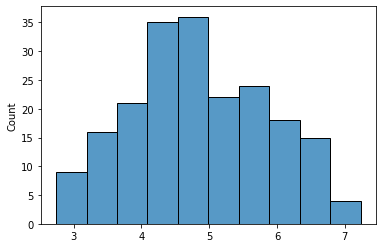

In [23]:
sns.histplot(yHat);

In [24]:
# Demo using statsmodels approach (OLS)

model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     442.8
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           1.28e-73
Time:                        23:05:19   Log-Likelihood:                -135.66
No. Observations:                 200   AIC:                             277.3
Df Residuals:                     197   BIC:                             287.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9638      0.035    143.610      0.000       4.896       5.032
x1             2.0012      0.117     17.151      0.000       1.771       2.231
x2             2.8751      0.117     24.630      0.000       2.645       3.105
==============================================================================
Omnibus:                        1.584   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                1.434
Skew:                           0.207   Prob(JB):                        0.488
Kurtosis:                       3.014   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Additionally

smf.ols('y ~ 1 + x1 + x2', data={'x1': x1, 'x2': x2, 'y': y}).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     442.8
Date:                Sun, 18 Feb 2024   Prob (F-statistic):           1.28e-73
Time:                        23:17:36   Log-Likelihood:                -135.66
No. Observations:                 200   AIC:                             277.3
Df Residuals:                     197   BIC:                             287.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9638      0.035    143.610      0.000       4.896       5.032
x1             2.0012      0.117     17.151      0.000       1.771       2.231
x2             2.8751      0.117     24.630      0.000       2.645       3.105
==============================================================================
Omnibus:                        1.584   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                1.434
Skew:                           0.207   Prob(JB):                        0.488
Kurtosis:                       3.014   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Check for Normality of the Residuals

In [27]:
# Check for Normality of the Residuals

np.random.seed(0)
n = 100

x1 = np.linspace(0, 1, n)
x2 = np.random.rand(n)

data = [
    pd.DataFrame({'x1': x1, 'x2': x2, 'y': 2 + 3*x1 + 4*x2 + stats.norm(0, 0.5).rvs(n)}),
    pd.DataFrame({'x1': x1, 'x2': x2, 'y': 2 + 3*x1 + 4*x2 + stats.norm(10, 1).rvs(n)}),
    pd.DataFrame({'x1': x1, 'x2': x2, 'y': 2 + 3*x1 + 4*x2 + stats.expon(10).rvs(n)})
]

In [28]:
results = [smf.ols('y ~ x1 + x2', data=df).fit() for df in data]

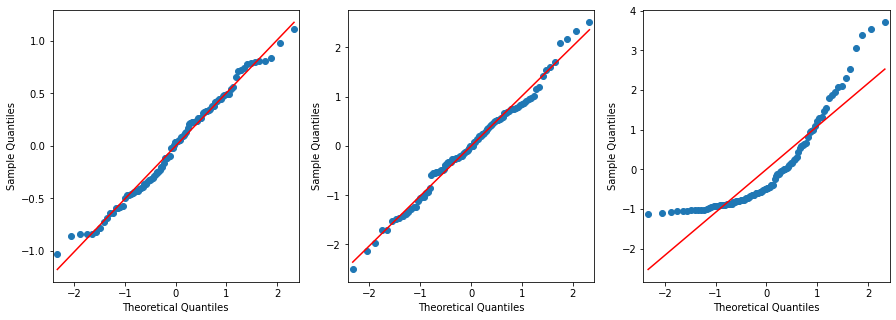

In [31]:
fig, axs = plt.subplots(1, len(results), figsize=(5*len(results), 5))

for i, res in enumerate(results):
    sm.qqplot(res.resid, line='r', ax=axs[i])

plt.show()

In [32]:
# Shapiro-Wilk test

shap_pval = [stats.shapiro(r.resid).pvalue for r in results]
shap_pval

[0.20842257142066956, 0.6571071743965149, 1.4983542184765497e-09]